# Goal

### To take the cleaned datasets from Kaggle for diabetes and determine what the best features and models are to determine diabetics.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import wrangle as w


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression

import warnings
warnings.filterwarnings('ignore')

# Acquire

### I acquired 2 datasets from Kaggle as csv downloads and saved them in my local folder from this site:
* https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_012_health_indicators_BRFSS2015.csv


- diabetes _ 012 _ health _ indicators _ BRFSS2015.csv


- diabetes _ binary _ health _ indicators _ BRFSS2015.csv

### The third dataset was created by me from the diabetes_012_health_indicators_BRFSS2015.csv
* I balanced the set to have equal weight across the diabetes_012 category

### The only differences between these 3 Dataframes below:

### * df1 Target Variable (diabetes_012) has 3 Classes, 0 for No Diabetes, 1 for Prediabetic, and 2 for Diabetic. Dataset was unbalanced.
- 253,680 Rows / 22 Columns
- Each Row represents a patient that participated in a survey
- Each Column represents a questions answered Yes/No or on a Numerical Scale

### * df2 Target Variable (diabetes_binary) has 2 classes, 0 for No Diabetes and 1 for prediabetic/diabetic. Dataset was unbalanced.
- 253,680 Rows / 22 Columns
- Each Row represents a patient that participated in a survey
- Each Column represents a questions answered Yes/No or on a Numerical Scale
### * df3 Target Variable (diabetes_012) has 3 Classes, 0 for No Diabetes, 1 for Prediabetic, and 2 for Diabetic. Dataset was balanced.
- 13983 Rows/ 22 Columns
- Each Row represents a patient that participated in a survey
- Each Column represents a questions answered Yes/No or on a Numerical Scale

In [2]:
# diabetes_012 Dataframe
df1 = w.acquire_diabetes_df1()

In [3]:
df1.head()

,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# diabetes_binary Dataframe
df2 = w.acquire_diabetes_df2()

In [5]:
df2.head()

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
# dataframe 3 was acquired and prep'd at the same time.
df3 = w.acquire_prep_diabetes_df3(df1)

In [7]:
df3.head()

,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
128062,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0
137343,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0
158835,0.0,1.0,0.0,1.0,38.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,3.0,0.0,1.0,9.0,4.0,6.0
78698,0.0,1.0,1.0,1.0,40.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,15.0,1.0,0.0,9.0,5.0,2.0
50338,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,5.0,8.0


# Prepare

### DF1: lower-cased the column names
### DF2: lower-cased the column names
### DF3: Pulled equal amounts of samples for diabetes_012 and appended them to one dataframe for equal weight in the target variable
- 13983 Rows/ 22 Columns

### Since these were cleaned sets from Kaggle, there wasn't a whole lot of prep work needed.

| Feature | Definition |
|--------|-----------|
|Diabetes_012| Ever Told you have diabetes 0=No/OnlyDuringPrgnancy, 1=Prediabetic, 2=Diabetic|
|HighBP| Have you ever been told you have High Blood Pressure, 0=No, 1=Yes|
|HighChol| Have you ever been told you have had High Cholesterol, 0=No, 1=Yes|
|CholCheck| Cholesterol Check in last 5 years?, 0=No, 1=Yes|
|BMI| Body Mass Index Number|
|Smoker| Smoke at least 100 cigarettes,etc in your entire life?, 0=No, 1=Yes|
|Stroke| Ever had a stroke, 0=No, 1=Yes|
|HeartDiseaseorAttack| Respondents that have ever reported having coronary heart disease or myocardial infarction? 0=No, 1=Yes|
|PhysActivity| Adults who reported doing physical activity or exercise during the past 30 days other than their regular job, 0=No, 1=Yes|
|Fruits| Consume Fruit 1 or more times per day, 0=No, 1=Yes|
|Veggies| Consume Vegetables 1 or more times per day, 0=No, 1=Yes|
|HvyAlcoholConsump| Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week), 0=No, 1=Yes|
|AnyHealthcare| Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? 0=No, 1=Yes|
|NoDocbcCost| Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0=No, 1=Yes|
|GenHlth| Would you say that in general your health is: 1 to 5 scale, 1 is excellent, 5 is poor|
|MentHlth| Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? Scale 1 - 30|
|PhysHlth| Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? Scale 1 - 30|
|DiffWalk| Do you have serious difficulty walking or climbing stairs? 0=No, 1=Yes|
|Sex| Indicate sex of respondent. 0= Female, 1= Male |
|Age| Fourteen-level age category,1 is 18-24, all the way to 80 and Older, 5 yr increments |
|Education| What is the highest grade or year of school you completed? 1 - 6, 1 is never attended school or kindergarten, 6 is college 4 yrs or more|
|Income| Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") 1-8, 1 is < 10k, 8 is > 75k|

# Explore

## 1st DataFrame

In [8]:
train1, validate1, test1 = w.split_data(df1, target='diabetes_012')

Train: 0.5599968464206875
Validate: 0.2400031535793125
Test: 0.2


### What is the correlation?

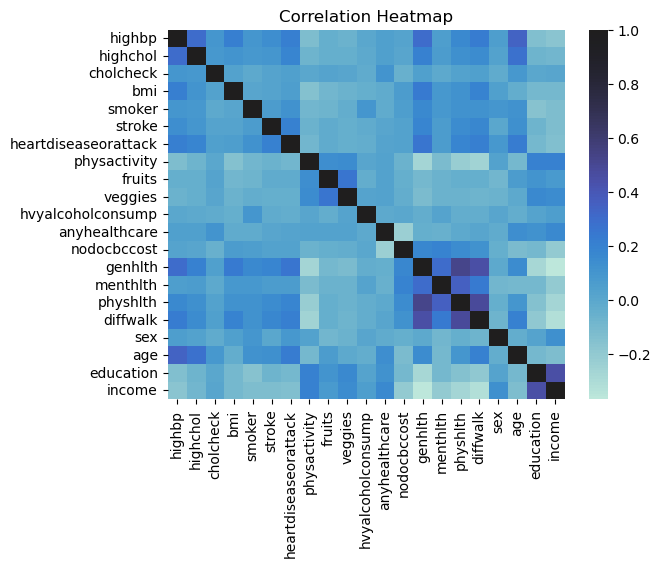

In [9]:
w.corr_heat(train1, 'diabetes_012')

### How does the percentage of diabetics/prediabetics and the features appear visually?


In [10]:
cat_cols, num_cols = w.column_split(train1)

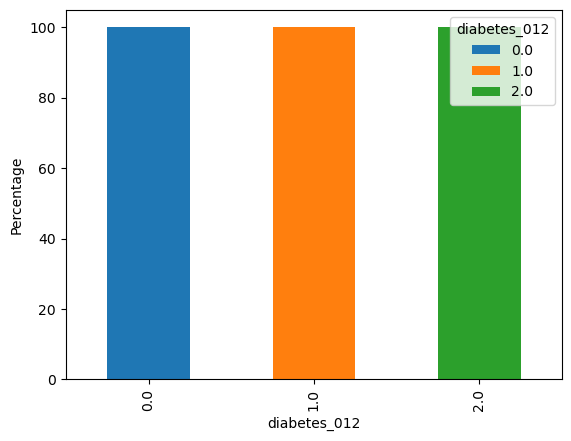

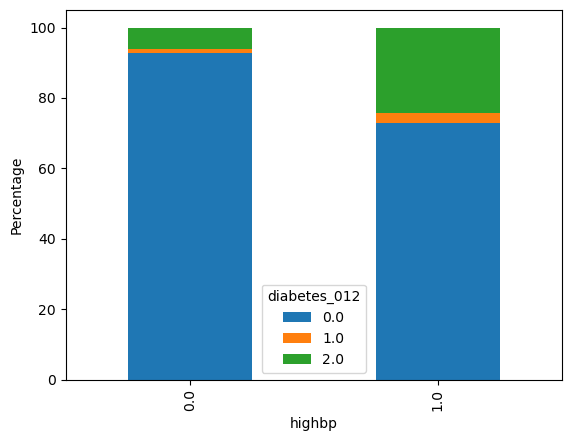

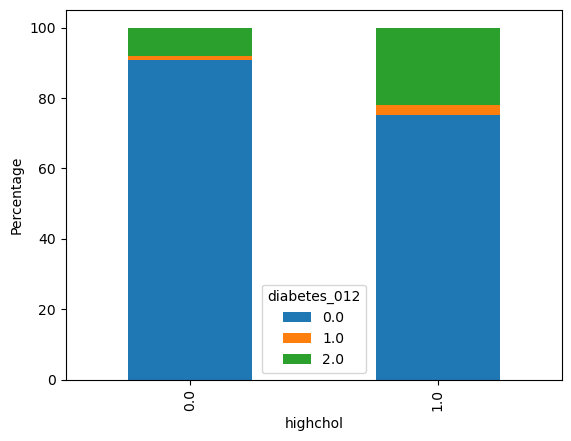

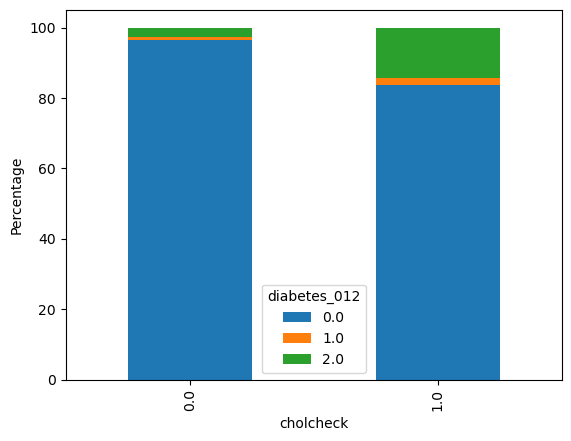

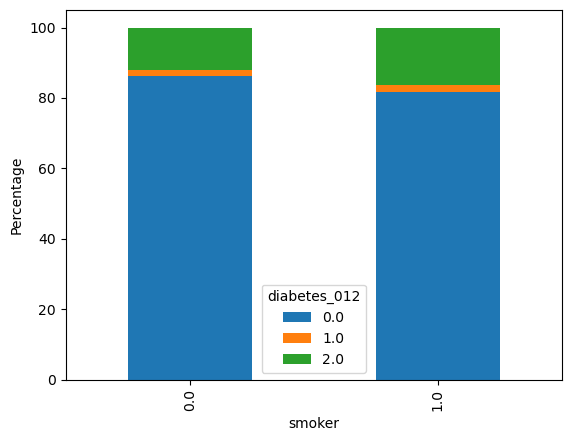

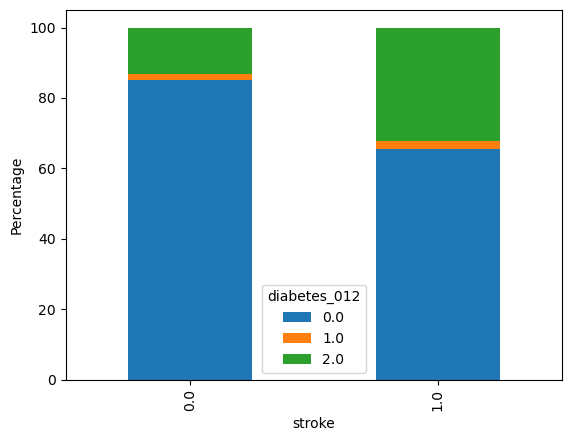

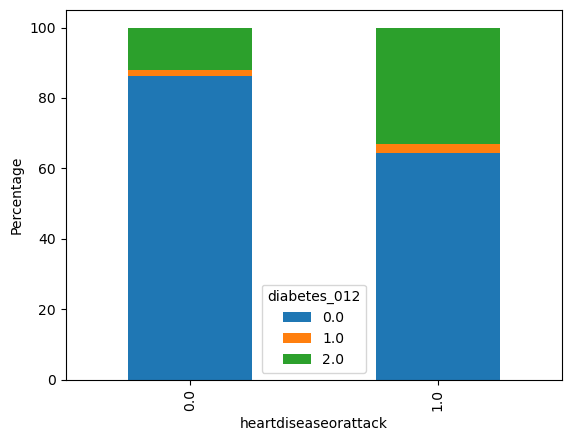

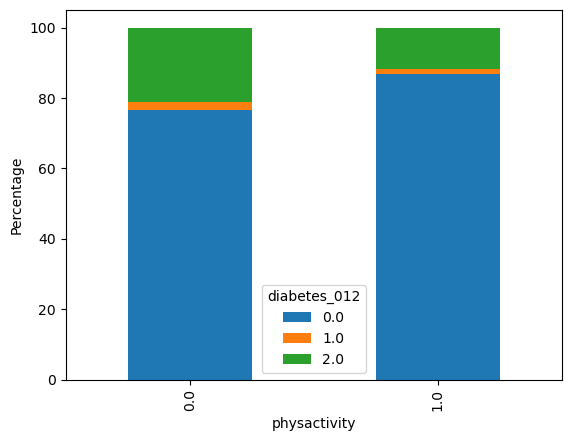

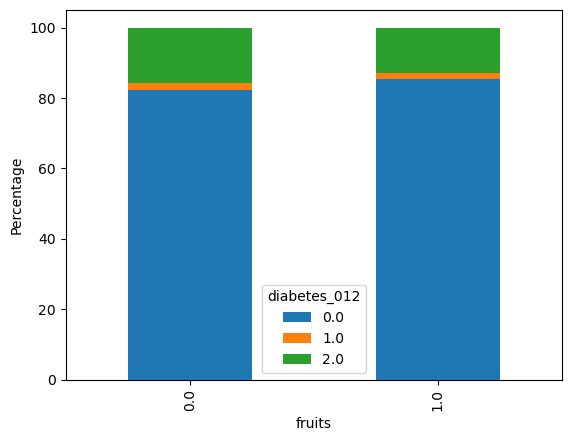

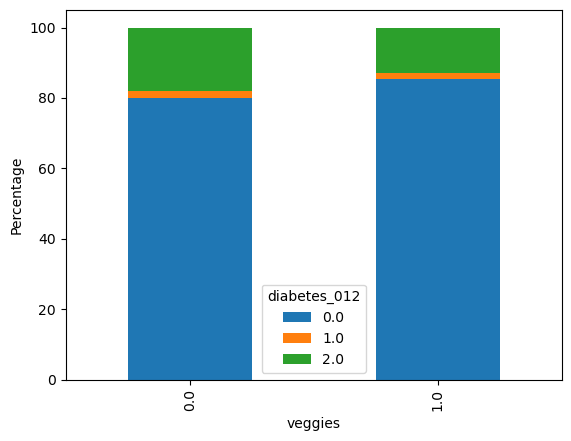

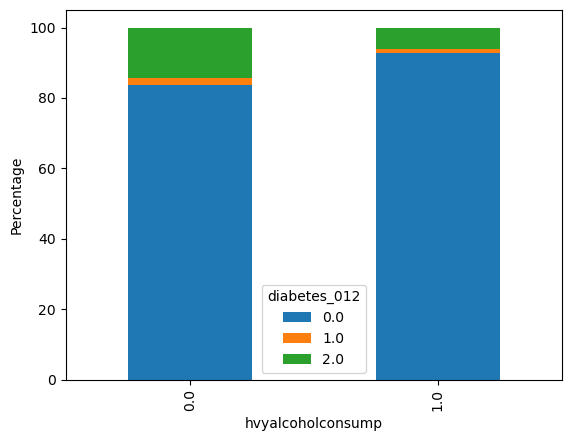

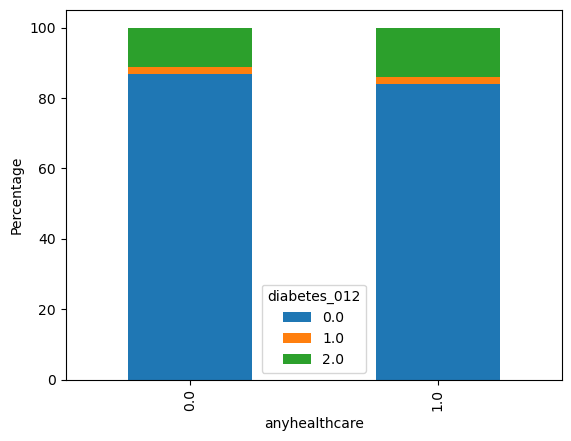

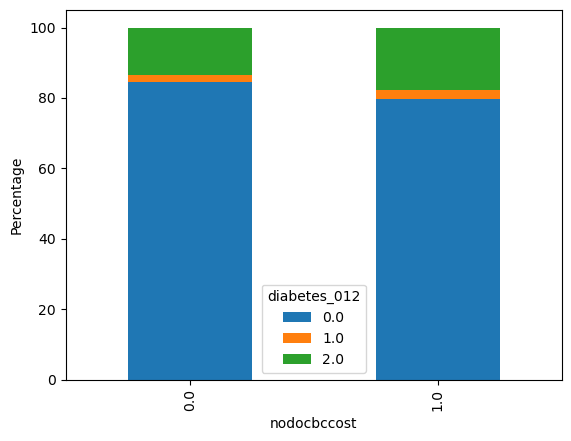

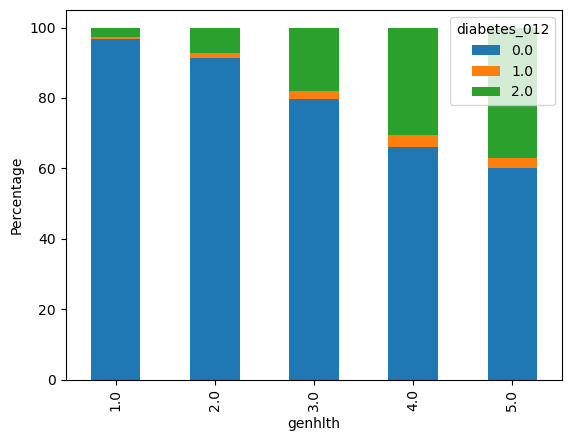

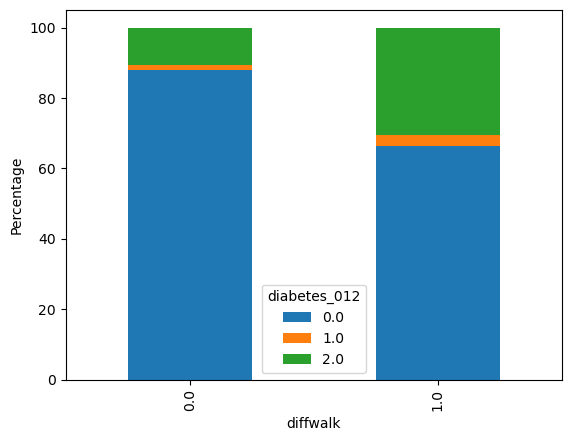

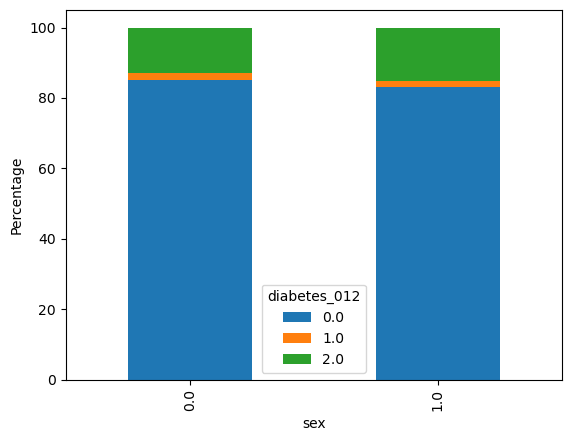

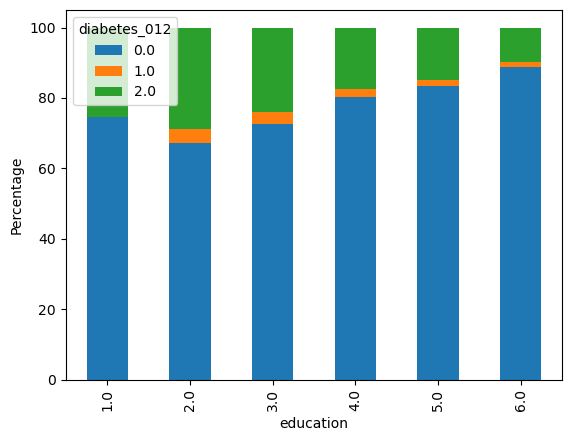

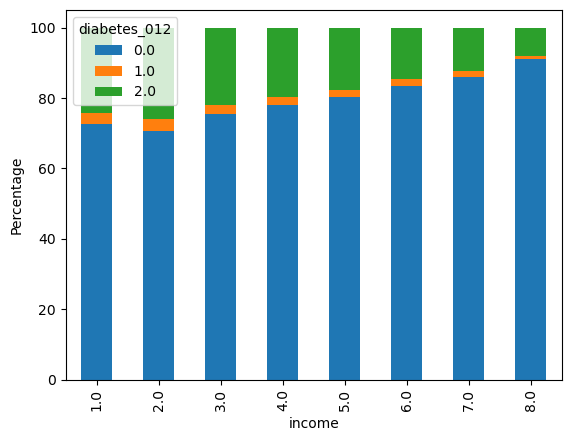

In [11]:
w.stacked_plot(cat_cols, train1)

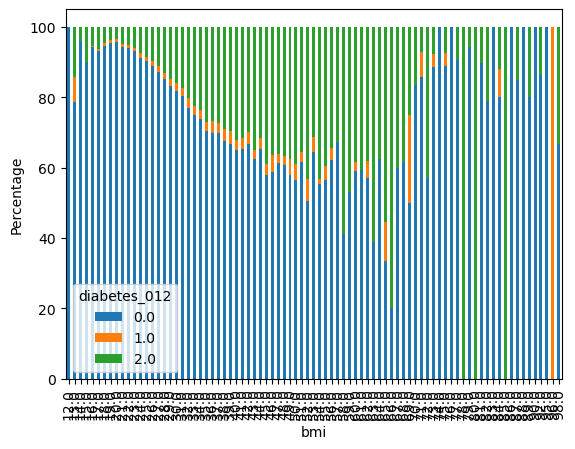

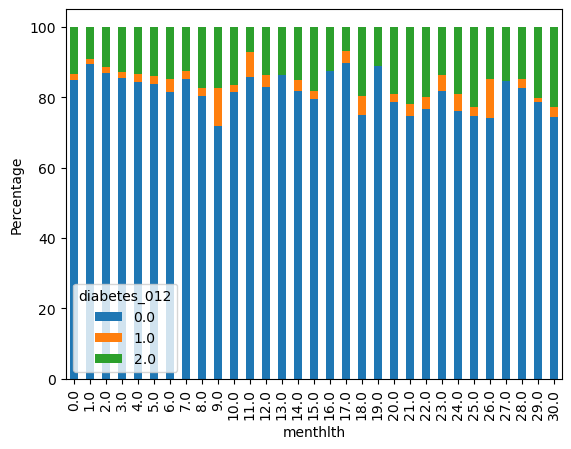

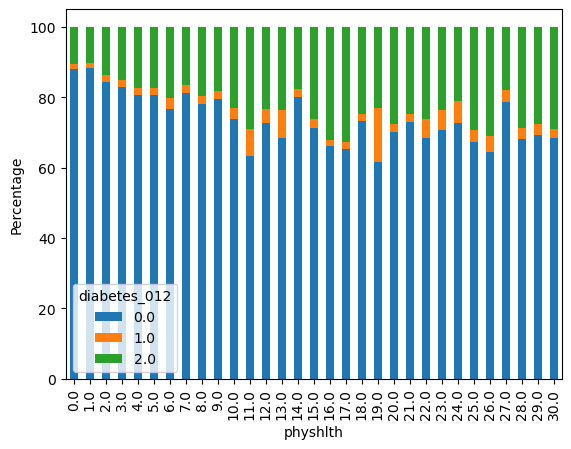

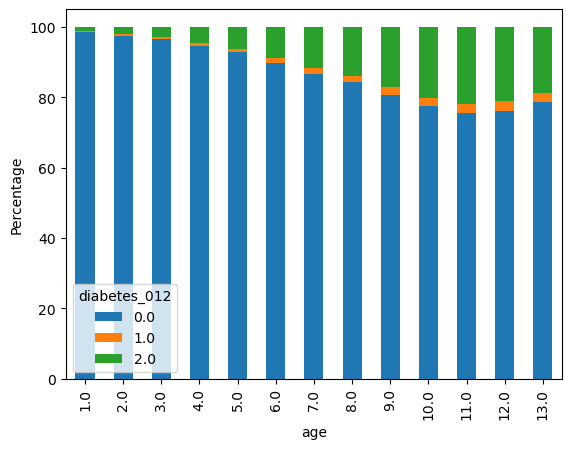

In [12]:
w.stacked_plot(num_cols, train1)

### What do we see from the graphs?



- age and diabetes_012
    - increases as age increases



- highbp/highchol/cholcheck
    - higher percentage for those with thoses who answered yes



- smoker
    - appears higher rate of diabetes in smokers



- stroke/heartdiseaseorattack
    - very large diff between those who have had a stroke and diabetes



- physactivity/fruits/veggies/
    - those who are not active have increased % in diabetes



- hvyalcoholconsump
    - could be skewed due to the question
    - more ppl lie about how much they drink
    - this is saying that more ppl who are not heavy drinkers have a higher % of diatetes



- anyhealthcare/nodocbccost
    - not much derived from this one



- genhlth
    - appears to be more % of diabetics the poorer the health



- diffwalk
    - diabetics have a higher chance of diff walking



- sex
    - doesnt appear to be alot of diff between if you are male or female



- education
    - lower education shows more diabetics



- income
    - lower income increases perc of diabetics

### From there lets look at the similarities



* highbp/highchol/cholcheck
* smoker
* stroke/heartdiseaseorattack
* physactivity/fruits/veggies
* education/income

### What do these features look like by age groups?

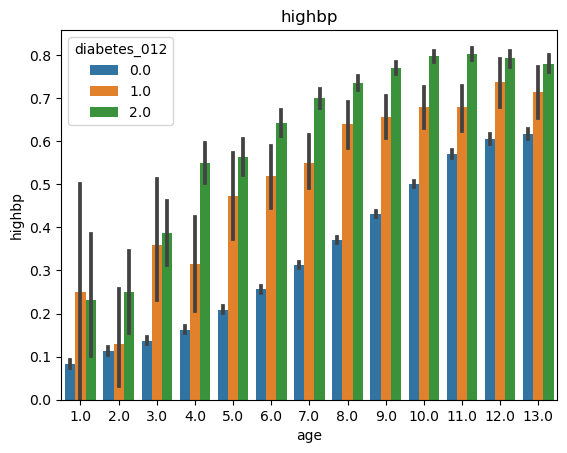

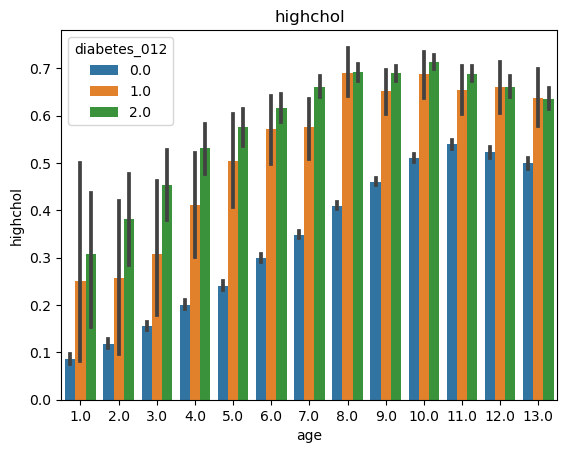

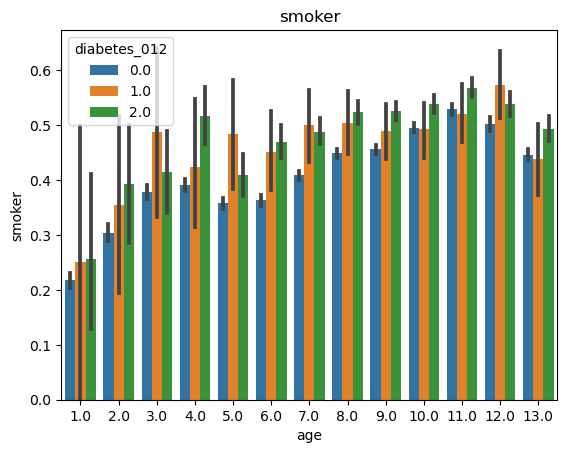

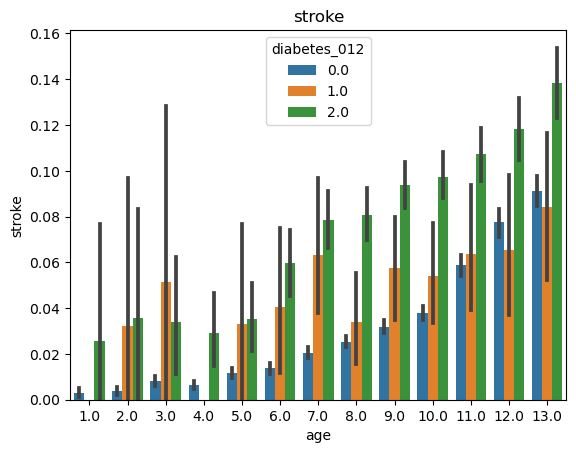

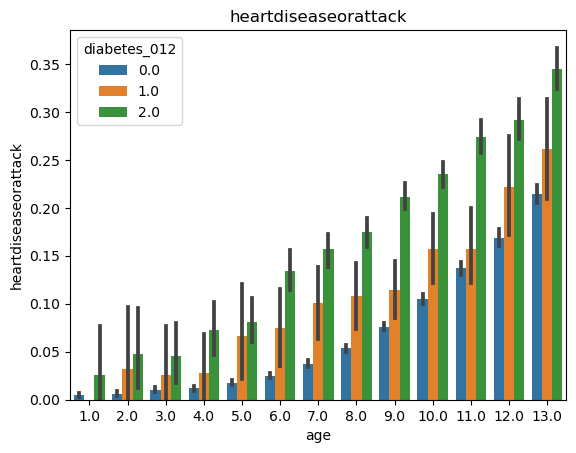

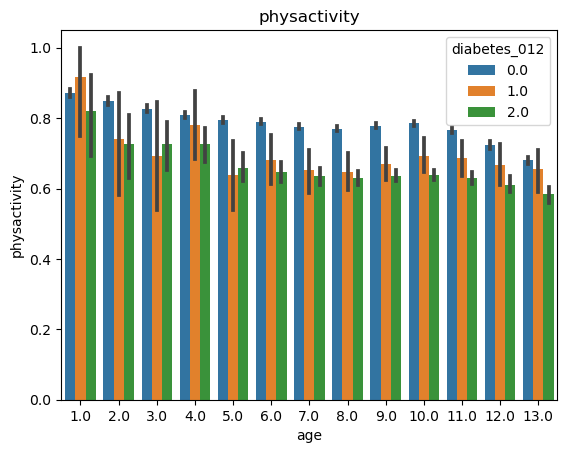

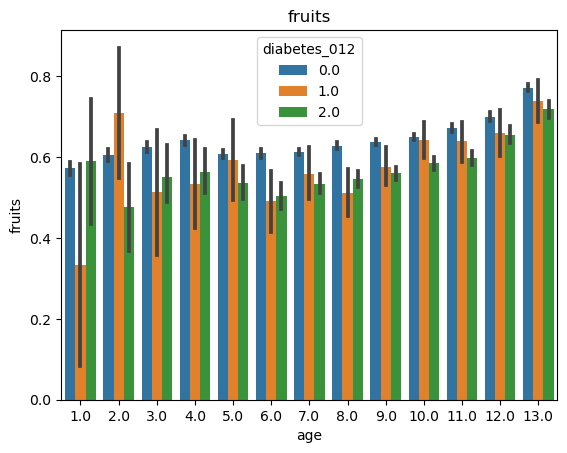

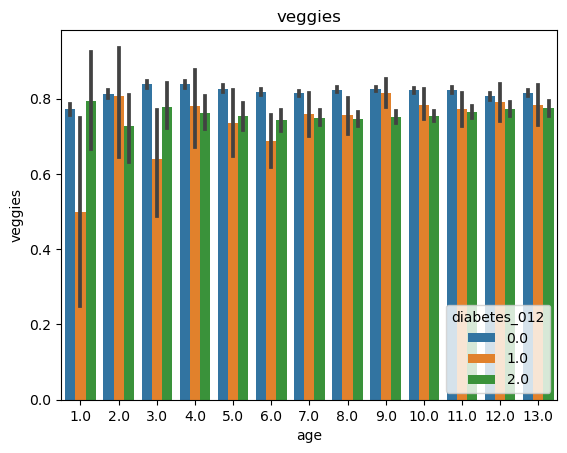

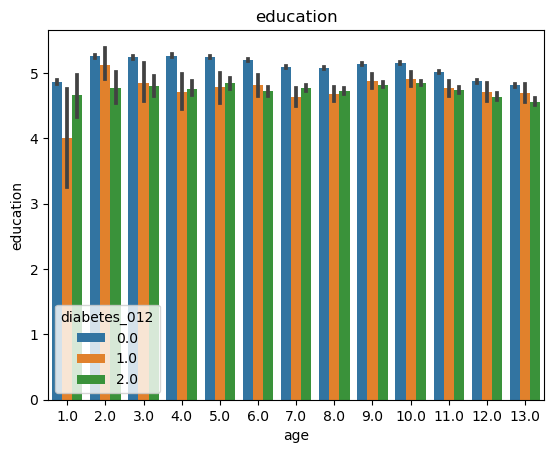

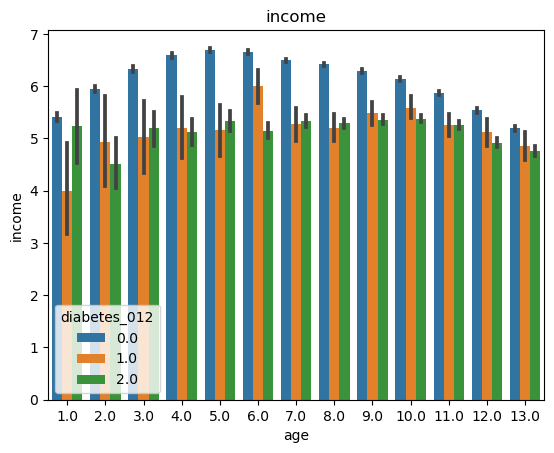

In [13]:
explore_cols = ['highbp', 'highchol', 'smoker', 'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies', 'education', 'income']


for col in explore_cols:
        plt.title(col)
        sns.barplot(data=train1, x='age', y=col, hue='diabetes_012', )
        plt.grid(False)
        plt.show()

### It seems highbp, highchol, smoker, stroke, and heardiseaseorattack greatly increases the percentage of diabetics and prediabetic patients as they get older.

### Stats

### We'll look into the dependence of the features and the target diabetes_012

In [14]:
# for 95% confidence well use alpha of .05
alpha = .05

H0: feature is independent of diabetes_012<p>
Ha: feature in dependent of diabetes_012

### highbp and diabetes_012

In [15]:
w.chi2_test(train1,'diabetes_012', 'highbp')

chi^2 = 10339.6872
p     = 0.0000
We reject the null hypothesis


highchol and diabetes_012

In [16]:
w.chi2_test(train1,'diabetes_012', 'highchol')

chi^2 = 6336.5529
p     = 0.0000
We reject the null hypothesis


smoker and diabetes_012

In [17]:
w.chi2_test(train1,'diabetes_012', 'smoker')

chi^2 = 612.7732
p     = 0.0000
We reject the null hypothesis


stroke and diabetes_012

In [18]:
w.chi2_test(train1,'diabetes_012', 'stroke')

chi^2 = 1718.8712
p     = 0.0000
We reject the null hypothesis


heartdiseaseorattack and diabetes_012

In [19]:
w.chi2_test(train1,'diabetes_012', 'heartdiseaseorattack')

chi^2 = 4610.9443
p     = 0.0000
We reject the null hypothesis


physactivity and diabetes_012

In [20]:
w.chi2_test(train1,'diabetes_012', 'physactivity')

chi^2 = 2078.8720
p     = 0.0000
We reject the null hypothesis


### All features in the explore_cols list show some sort of dependency to determining diabetes_012

## 2nd Dataframe

In [21]:
train2, validate2, test2 = w.split_data(df2, target='diabetes_binary')

Train: 0.5599968464206875
Validate: 0.2400031535793125
Test: 0.2


## 3rd Dataframe

In [22]:
train3, validate3, test3 = w.split_data(df3, target='diabetes_012')

Train: 0.559922263010149
Validate: 0.2400489455121284
Test: 0.2000287914777226


# Exploration Summary

### To recap Exploration
- It seems highbp, highchol, smoker, stroke, and heardiseaseorattack greatly increases the percentage of diabetics and prediabetic patients as they get older.
- Having a lower income/education level puts younger patients at higher risk of diabetes
- BMI visually shows as bmi increases, so does the amount of patients with diabetes.
- Next we'll go to modeling with all features

# Modeling


## We'll start with df1: 
- Target: 'diabetes_012'


In [23]:
X_train1, X_validate1, X_test1, y_train1, y_validate1, y_test1 = w.next_split(train1, validate1, test1, 'diabetes_012')

In [24]:
# baseline
w.calculate_baseline_accuracy(y_train1, y_validate1)

Baseline accuracy on validation set: 0.8424


### Random Forest Model

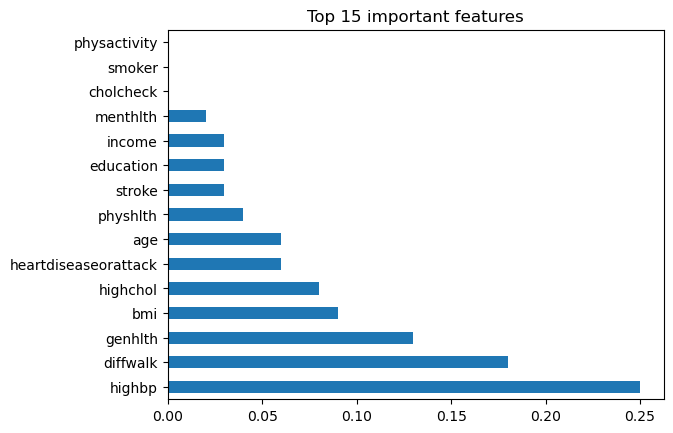

,min_samples_leaf,max_depth,train_acc,val_acc,diff_acc
6,7,4,0.842412,0.842405,0.000006
7,8,3,0.842412,0.842405,0.000006
8,9,2,0.842412,0.842405,0.000006
9,10,1,0.842412,0.842405,0.000006
5,6,5,0.844249,0.844113,0.000136
3,4,7,0.847332,0.846528,0.000804
4,5,6,0.845622,0.844787,0.000835
2,3,8,0.848592,0.846889,0.001703
1,2,9,0.850232,0.847710,0.002522
0,1,10,0.852344,0.848597,0.003747


In [25]:
scores_df1 = w.rforest(X_train1, X_validate1, y_train1, y_validate1)
scores_df1

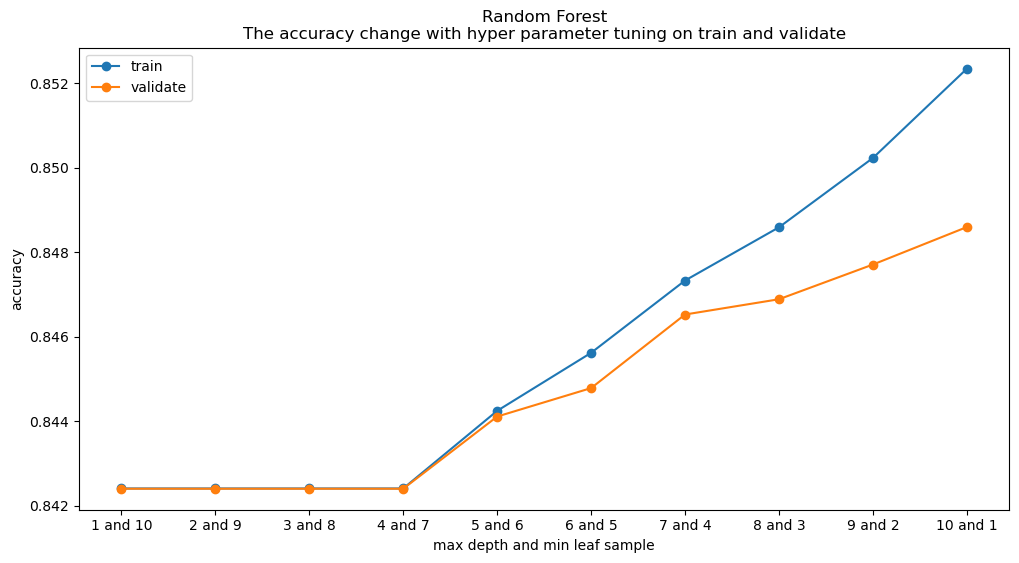

In [26]:
w.plotForest(scores_df1.sort_index())

### K Nearest Neighbors

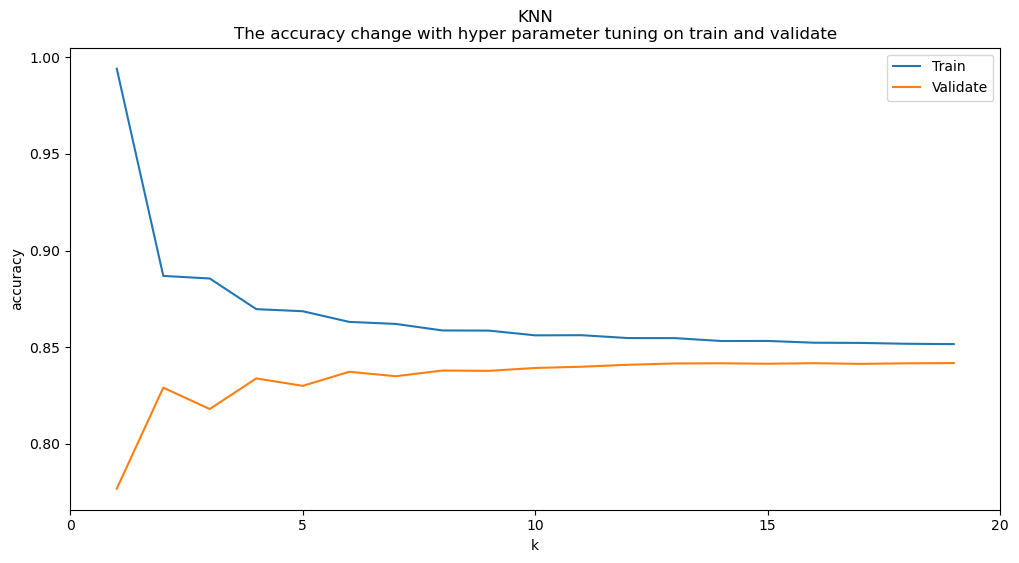

In [27]:
w.get_knn(X_train1, X_validate1, y_train1, y_validate1)

In [28]:
w.get_knn_k(X_train1, X_validate1, y_train1, y_validate1, 15)

 Accuracy of KNN on train data is 0.8532310291426158
 Accuracy of KNN on validate data is 0.841436173707378


### Logistic Regression

In [29]:
w.logreg_grid(X_train1, X_validate1, y_train1, y_validate1)

Train Set Accuracy: 0.8459242573560467
Validate Set Accuracy: 0.8470041390184614


### Best Features

In [31]:
w.select_kbest(X_train1, y_train1, 10)

Index(['highbp', 'highchol', 'bmi', 'heartdiseaseorattack', 'genhlth',
       'physhlth', 'diffwalk', 'age', 'education', 'income'],
      dtype='object')

## Next is df2:

In [32]:
X_train2, X_validate2, X_test2, y_train2, y_validate2, y_test2 = w.next_split(train2, validate2, test2, 'diabetes_binary')

In [45]:
w.calculate_baseline_accuracy(y_train2, y_validate2)

Baseline accuracy on validation set: 0.8607


### Random Forest Model

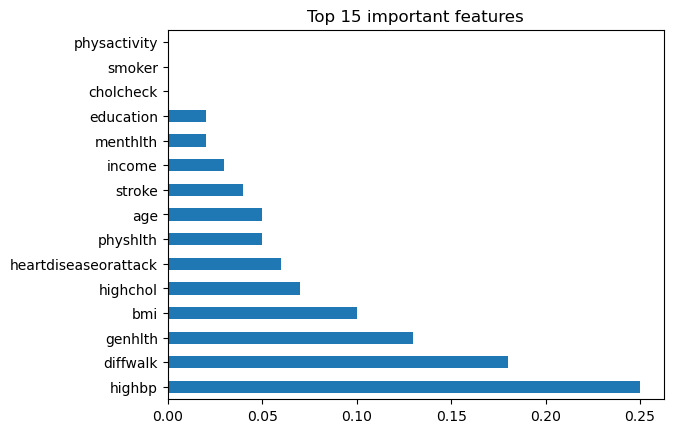

,min_samples_leaf,max_depth,train_acc,val_acc,diff_acc
6,7,4,0.860665,0.860669,-0.000005
7,8,3,0.860665,0.860669,-0.000005
8,9,2,0.860665,0.860669,-0.000005
9,10,1,0.860665,0.860669,-0.000005
5,6,5,0.861516,0.861425,0.000091
4,5,6,0.862664,0.862558,0.000105
3,4,7,0.864255,0.863807,0.000448
2,3,8,0.865655,0.864201,0.001455
1,2,9,0.867464,0.864808,0.002656
0,1,10,0.870020,0.864891,0.005129


In [33]:
scores_df2 = w.rforest(X_train2, X_validate2, y_train2, y_validate2)
scores_df2

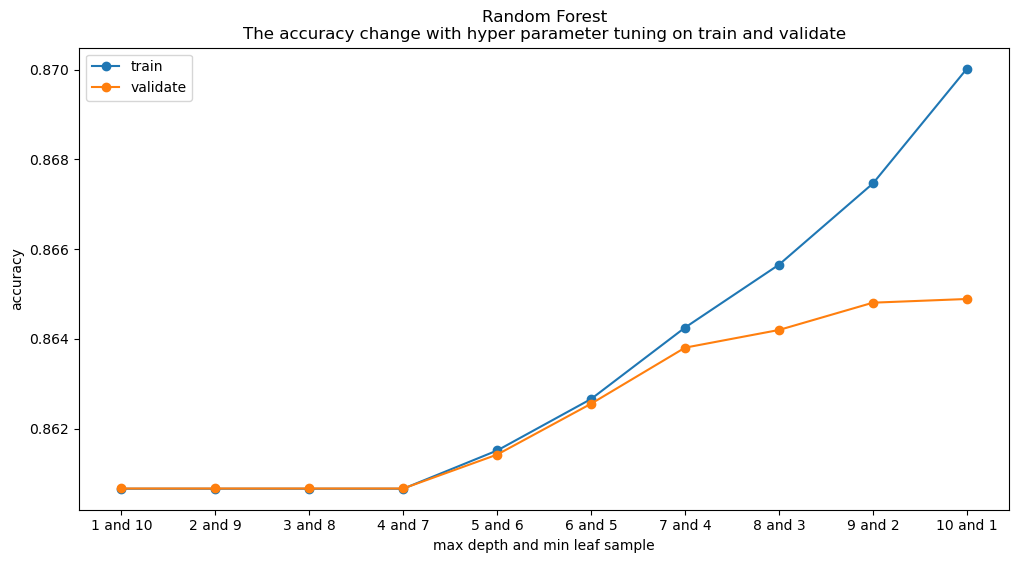

In [34]:
w.plotForest(scores_df2.sort_index())

### K Nearest Neighbors

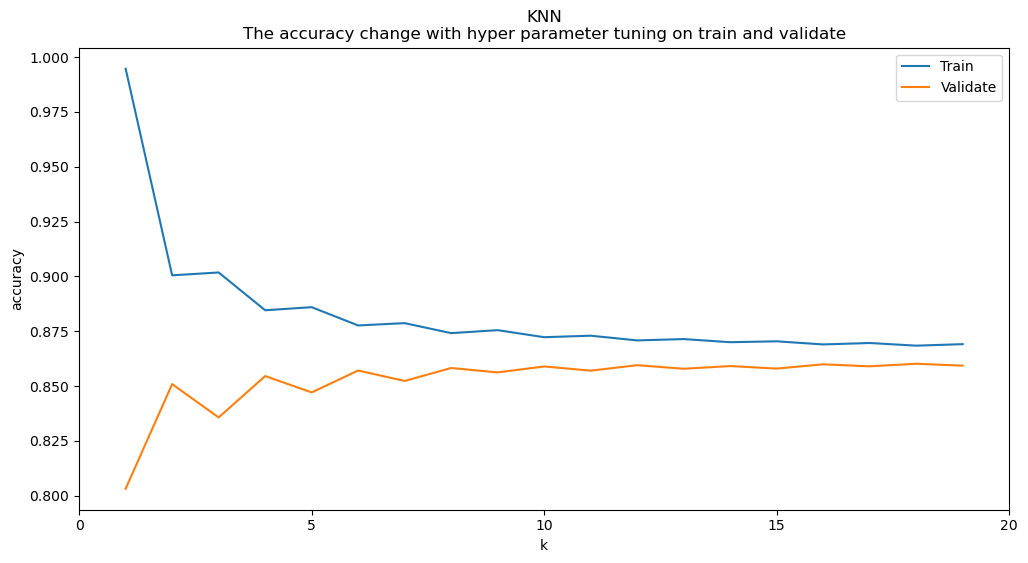

In [35]:
w.get_knn(X_train2, X_validate2, y_train2, y_validate2)

In [36]:
w.get_knn_k(X_train2, X_validate2, y_train2, y_validate2, 15)

 Accuracy of KNN on train data is 0.8704350274531888
 Accuracy of KNN on validate data is 0.8580086722291571


### Logistic Regression

In [37]:
w.logreg_grid(X_train2, X_validate2, y_train2, y_validate2)

Train Set Accuracy: 0.8635435731381107
Validate Set Accuracy: 0.8621805400433612


### Best Features

In [38]:
w.select_kbest(X_train2, y_train2, 10)

Index(['highbp', 'highchol', 'bmi', 'heartdiseaseorattack', 'genhlth',
       'physhlth', 'diffwalk', 'age', 'education', 'income'],
      dtype='object')

## Next is df3:

In [39]:
X_train3, X_validate3, X_test3, y_train3, y_validate3, y_test3 = w.next_split(train3, validate3, test3, 'diabetes_012')

In [46]:
w.calculate_baseline_accuracy(y_train3, y_validate3)

Baseline accuracy on validation set: 0.3334


### Random Forest Model

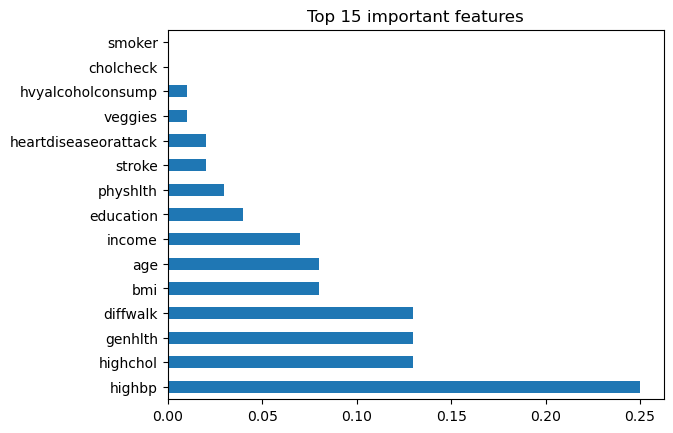

,min_samples_leaf,max_depth,train_acc,val_acc,diff_acc
9,10,1,0.497108,0.490855,0.006253
7,8,3,0.512919,0.505247,0.007672
8,9,2,0.512919,0.498651,0.014269
6,7,4,0.524103,0.508246,0.015857
5,6,5,0.541201,0.509445,0.031755
4,5,6,0.560612,0.510645,0.049967
3,4,7,0.581951,0.512444,0.069508
2,3,8,0.622445,0.510945,0.111501
1,2,9,0.672066,0.514243,0.157823
0,1,10,0.742512,0.507646,0.234866


In [40]:
scores_df3 = w.rforest(X_train3, X_validate3, y_train3, y_validate3)
scores_df3

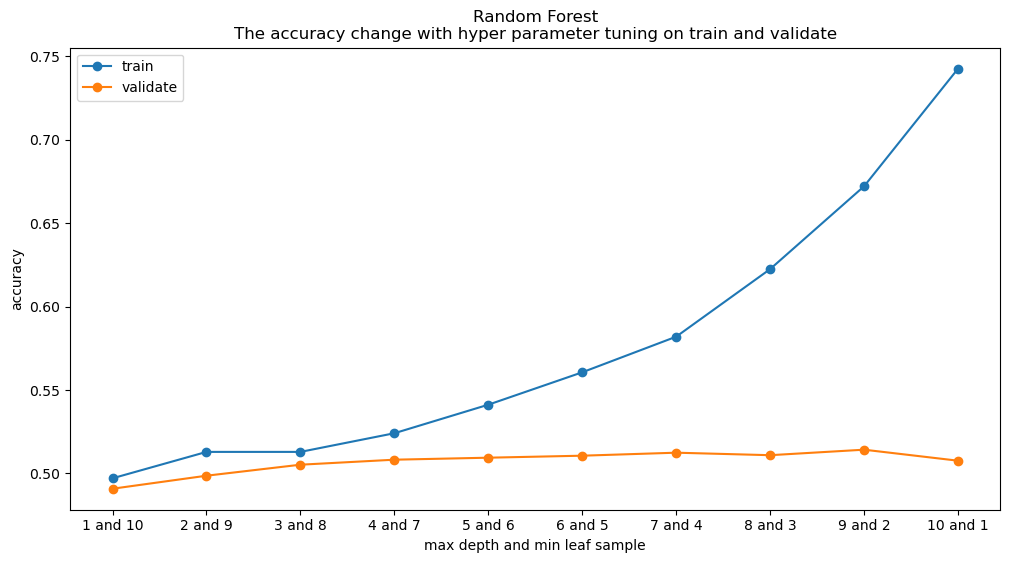

In [47]:
w.plotForest(scores_df3.sort_index())

### K Nearest Neighbors

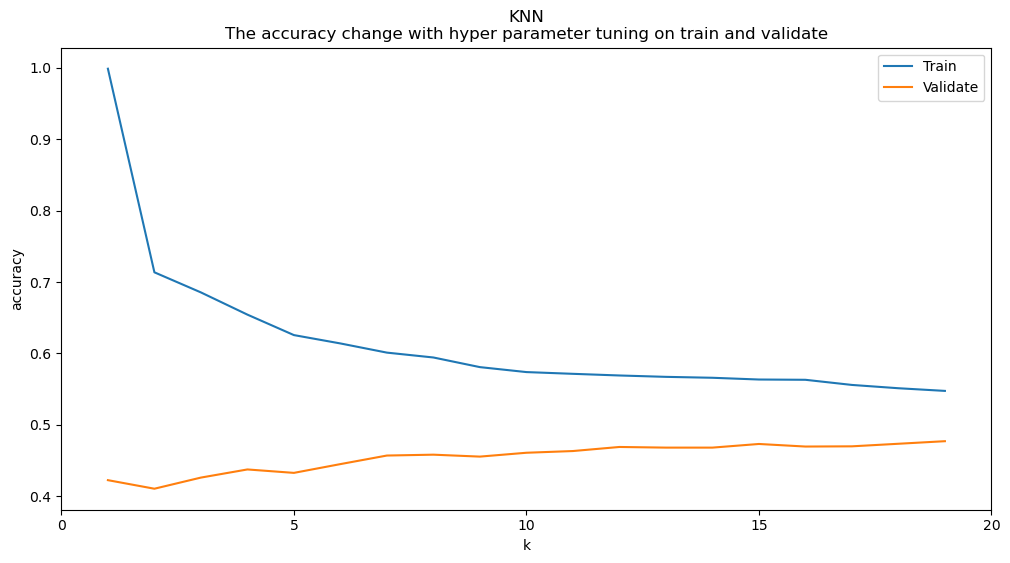

In [41]:
w.get_knn(X_train3, X_validate3, y_train3, y_validate3)

In [42]:
w.get_knn_k(X_train3, X_validate3, y_train3, y_validate3, 17)

 Accuracy of KNN on train data is 0.5558555084201054
 Accuracy of KNN on validate data is 0.4698650674662669


Logistic Regression

In [43]:
w.logreg_grid(X_train3, X_validate3, y_train3, y_validate3)

Train Set Accuracy: 0.5248746625530274
Validate Set Accuracy: 0.504047976011994


### Best Features

In [44]:
w.select_kbest(X_train3, y_train3, 10)

Index(['highbp', 'highchol', 'bmi', 'heartdiseaseorattack', 'genhlth',
       'physhlth', 'diffwalk', 'age', 'education', 'income'],
      dtype='object')

# Conclusion

## Summary

## Recommendations